In [13]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import sys
if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv, sum_hand

In [14]:
env = BlackjackEnv()

In [45]:
def print_observation(observation):
    score, dealer_score, usable_ace = observation
    print("Player Score: {} (Usable Ace: {}), Dealer Score: {}".format(
          score, usable_ace, dealer_score))

def strategy(observation, stick_score):
    score, dealer_score, usable_ace = observation
    # Stick (action 0) if the score is > 20, hit (action 1) otherwise
    return 0 if score >= stick_score else 1

def play(episodes, stick_score, print_details):
    cum_reward = 0
    for i_episode in range(episodes):
        observation = env.reset()
        for t in range(100):
            if print_details:
                print_observation(observation)
            action = strategy(observation, stick_score)
            if print_details:
                print("Taking action: {}".format( ["Stick", "Hit"][action]))
            observation, reward, done, _ = env.step(action)
            if done:
                if print_details:
                    print_observation(observation)
                    print("Game end. Dealer score: {}, Reward: {}\n".format(sum_hand(env.dealer), float(reward)))
                cum_reward += reward
                break
    average_reward = cum_reward/episodes
    if print_details:
        print('Average rewards: {}'.format(average_reward))
        
    return average_reward

In [46]:
reward = play(stick_score=17, episodes=20, print_details=True)

Player Score: 17 (Usable Ace: True), Dealer Score: 3
Taking action: Stick
Player Score: 17 (Usable Ace: True), Dealer Score: 3
Game end. Dealer score: 20, Reward: -1.0

Player Score: 18 (Usable Ace: False), Dealer Score: 10
Taking action: Stick
Player Score: 18 (Usable Ace: False), Dealer Score: 10
Game end. Dealer score: 18, Reward: 0.0

Player Score: 17 (Usable Ace: False), Dealer Score: 10
Taking action: Stick
Player Score: 17 (Usable Ace: False), Dealer Score: 10
Game end. Dealer score: 20, Reward: -1.0

Player Score: 14 (Usable Ace: False), Dealer Score: 7
Taking action: Hit
Player Score: 24 (Usable Ace: False), Dealer Score: 7
Game end. Dealer score: 17, Reward: -1.0

Player Score: 16 (Usable Ace: False), Dealer Score: 10
Taking action: Hit
Player Score: 26 (Usable Ace: False), Dealer Score: 10
Game end. Dealer score: 17, Reward: -1.0

Player Score: 12 (Usable Ace: False), Dealer Score: 10
Taking action: Hit
Player Score: 15 (Usable Ace: False), Dealer Score: 10
Taking action: Hi

Best strategy is to stick after 16, average reward: -0.0562


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


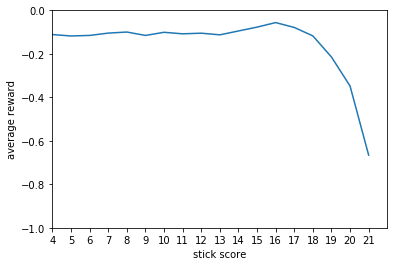

In [48]:
reward_list = [] 

for i in range(4, 22):
    reward = play(stick_score=i, episodes=10000, print_details=False)
    reward_list.append(reward)

print('Best strategy is to stick after {}, average reward: {}'.format(np.argmax(reward_list)+4, max(reward_list)))

fig, ax = plt.subplots()

ax.plot(list(range(4, 22)), reward_list)
ax.set_xlabel('stick score')
ax.set_ylabel('average reward')

ax.set_xlim(4, 22)
ax.set_xticks(range(4, 22))

ax.set_ylim(-1, 0)

fig.show()